# Assignment 3
#### Emre Nuray           090180152
#### Ahmet Yusuf Kılıç 090180121
#### Çağla Demirhan    090180163

## MNIST Multi-Layer Perceptron


In [1]:
import torch
import numpy as np

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# choose and loading training and test datasets
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)

C:\Users\emren\AppData\Local\Temp/ipykernel_11504/4186185134.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


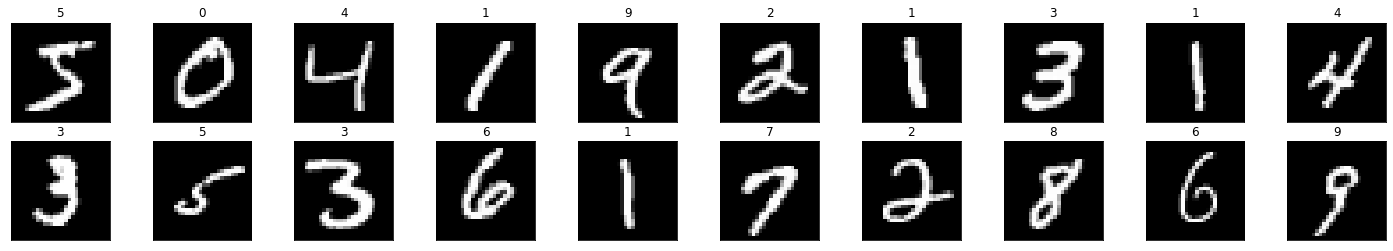

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(labels[idx].item()))

In [4]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        return x

model = Net()

In [5]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [103]:
n_epochs = 40

model.train() # prep model for training
tr_curve_datas = np.array([])

for epoch in range(n_epochs):
    train_loss = 0.0
    
    # train the model
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: ', epoch+1, '   ', "Training Loss: ",train_loss)
    tr_curve_datas = np.append(tr_curve_datas, train_loss)

Epoch:  1     Training Loss:  0.2585819410958017
Epoch:  2     Training Loss:  0.25830232146413373
Epoch:  3     Training Loss:  0.2580285048281463
Epoch:  4     Training Loss:  0.2577602737012785
Epoch:  5     Training Loss:  0.2574974224044321
Epoch:  6     Training Loss:  0.2572397459944089
Epoch:  7     Training Loss:  0.2569870802611113
Epoch:  8     Training Loss:  0.256739233924464
Epoch:  9     Training Loss:  0.25649604423289807
Epoch:  10     Training Loss:  0.25625733807163004
Epoch:  11     Training Loss:  0.25602299737829404
Epoch:  12     Training Loss:  0.2557928498352412
Epoch:  13     Training Loss:  0.2555667729208556
Epoch:  14     Training Loss:  0.2553446373185919
Epoch:  15     Training Loss:  0.25512630941703296
Epoch:  16     Training Loss:  0.2549116710135713
Epoch:  17     Training Loss:  0.2547006242829375
Epoch:  18     Training Loss:  0.2544930385199065
Epoch:  19     Training Loss:  0.2542888174954181
Epoch:  20     Training Loss:  0.25408786795513394
Epoc

In [124]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
nn_acc_datas = np.array([])

model.eval() # *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(20):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: ', test_loss)

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
        nn_acc_datas = np.append(nn_acc_datas, 100 * class_correct[i] / class_total[i])
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))




Test Loss:  0.26576834751758727
Test Accuracy of     0: 97% (960/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 89% (925/1032)
Test Accuracy of     3: 91% (920/1010)
Test Accuracy of     4: 92% (910/982)
Test Accuracy of     5: 88% (785/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 92% (948/1028)
Test Accuracy of     8: 88% (864/974)
Test Accuracy of     9: 92% (931/1009)

Test Accuracy (Overall): 92% (9262/10000)


C:\Users\emren\AppData\Local\Temp/ipykernel_11504/4057720308.py:16: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(1, 20/2, idx+1, xticks=[], yticks=[])


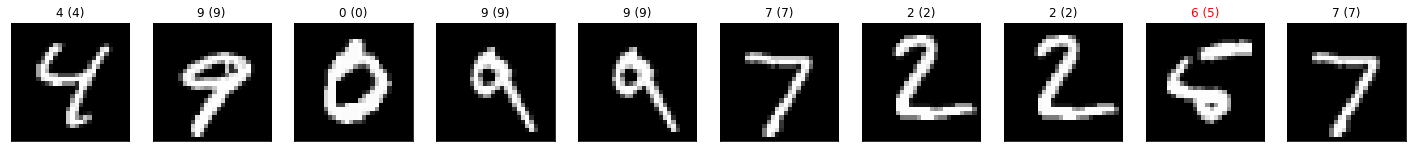

In [47]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(10):
    sample = np.random.randint(0,10)
    ax = fig.add_subplot(1, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[sample]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[sample].item()), str(labels[sample].item())),
                 color=("black" if preds[sample]==labels[sample] else "red"))

## MNIST with SVM

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.svm import SVC

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X /255.0

print("fetched !")

X_train, X_test = X[:1000], X[1000:] ;    y_train, y_test = y[:1000], y[1000:]

model_SVC_wr = SVC(C=10, gamma=0.001, kernel="rbf")
model_SVC_wr.fit(X_train, y_train)
y_predict_SVC_wr = model_SVC_wr.predict(X_test)

print("SVC Model using regularization accuracy: \t",
        metrics.accuracy_score(y_test, y_predict_SVC_wr), "\n")

fetched !
SVC Model using regularization accuracy: 	 0.8841594202898551 



## Plotting Learning Curve

### SVM

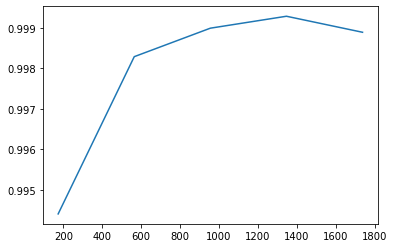

In [120]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits

estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

### NN (MLP)

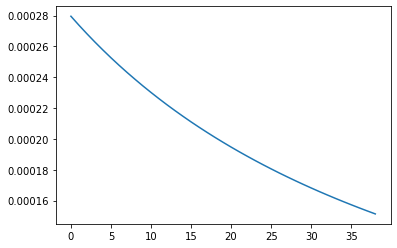

In [123]:
plt.plot(tr_curve_datas[:-1]-tr_curve_datas[1:])